# Visualization with Matplotlib

In order to understand and effectively use Matplotlib to make visualizations of data, it's important to understand the parts of a Matplotlib figure object. The code in the cell below is [taken directly from the Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html), which uses Matplotlib code to create an annotated graph that demonstrates the many facets of a plot. And because the code is provided, it illustrates how to use them. Note that some of the objects and methods used in the code below are things that you might not use regularly (if ever). But many of the methods below will become very familiar to you throughout the rest of the semester and as you use Matplotlib in your research

### __Challenge:__ What is the code below doing?

Execute the Jupyter notebook code below and verify that it produces a plot with a variety of annotations. Then, with a partner, review the lines of the cell and add comments that denote what the line of code does. Also, in the last class when we made our first figure, we used the command `plt.xlabel('Axis label')` command as opposed to the use of the `ax.set_label('Axis label')` in the code below. Why do these two uses differ? 

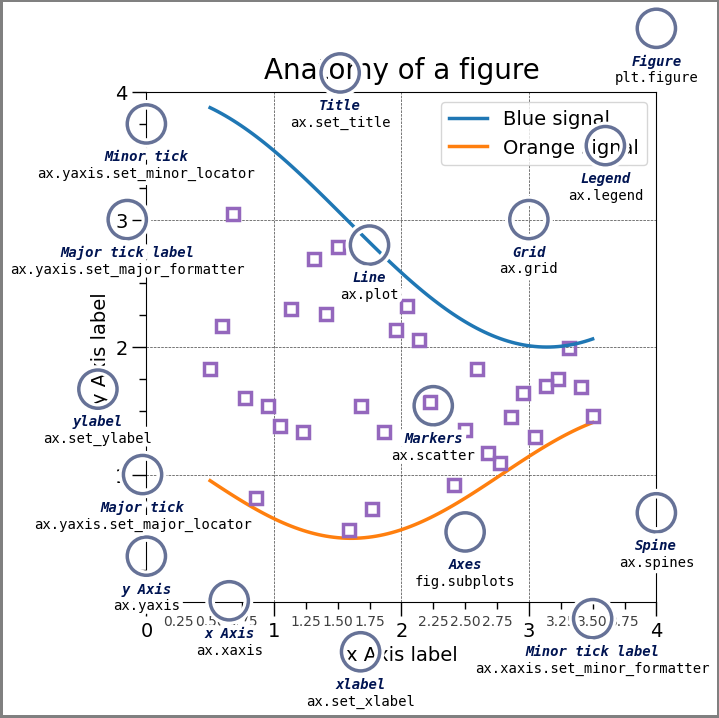

In [ ]:
import matplotlib.pyplot as plt #import matplotlib
import numpy as np #import numpy

from matplotlib.patches import Circle #import circle function - ability to draw a circle
from matplotlib.patheffects import withStroke #import formatting tool
from matplotlib.ticker import AutoMinorLocator, MultipleLocator #control tick locations

royal_blue = [0, 20/256, 82/256] #define color in terms of rgb fractions


# make the figure

np.random.seed(19680801) #setting random seed

X = np.linspace(0.5, 3.5, 100) #start, stop, number of points. independent variable
Y1 = 3+np.cos(X) #function
Y2 = 1+np.cos(1+X/0.75)/2 #function
Y3 = np.random.uniform(Y1, Y2, len(X)) #100 random points between threshold (y1 and y2)

fig = plt.figure(figsize=(7.5, 7.5)) #set figure size
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1) #add axes to the figure

ax.xaxis.set_major_locator(MultipleLocator(1.000)) #add larger ticks to x-axis every 1
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) #add smaller ticks to x-axis - 4 between each integer
ax.yaxis.set_major_locator(MultipleLocator(1.000)) #add larger ticks to y-axis every 1
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #add smaller ticks to y-axis - 4 between each integer
ax.xaxis.set_minor_formatter("{x:.2f}") #set format of ticks

ax.set_xlim(0, 4) #make limit of x axis between 0 and 4
ax.set_ylim(0, 4) #make limit of y axis between 0 and 4

ax.tick_params(which='major', width=1.0, length=10, labelsize=14) #specify appearance of major ticks
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10, #specify appearance of minor ticks
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) #add a grid with dashed lines to plot

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10) #plot line for X vs. Y1
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal") #plot line for X vs. Y3
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9, #plot squares as scatter plot
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom') #define the title of the plot
ax.set_xlabel("x Axis label", fontsize=14) #define the label for the x axis
ax.set_ylabel("y Axis label", fontsize=14) #define the label for the y axis
ax.legend(loc="upper right", fontsize=14) #specify where the legend will go


# Annotate the figure

def annotate(x, y, text, code): #function to annotate figure with circles and labels
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5, #plot circles at specified places
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c) #adding circles manually to the plot

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:  #add text attached to the circle
        color = 'white' if path_effects else royal_blue #if the background is royal_blue, make the background of text white
        ax.text(x, y-0.2, text, zorder=100, #formatting text
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black' #if the background is black, make the background of text white
        ax.text(x, y-0.33, code, zorder=100, #formatting text
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


#add labels on plot
#specify where to plot label, what to label name, and what to label function
annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5') #make the frame a rectangle
plt.show() #display the figure

## __Challenge:__ Beautify an Intentionally Ugly Graph

The code in the cell below reads in daily average streamflow data for Water Year 2017 (i.e., from 2016-10-01 to 2017-09-30) for one of four gages in the Upper Boise River Basin. It uses the `pandas` library to do so. We'll learn a lot more about `pandas` later, but for now this provides us with the ability to deal with dates and times in a structured way that doesn't require us to format text. 

The cell that follows then creates a very rudimentary (i.e., bad) plot of the streamflow for the water year. Your task as a table, is to use what you learned about Matplotlib figures in the exercise above, and the [Matplotlib documentation](https://matplotlib.org/stable/users/index) (if needed) to create something approaching a "presentation ready" figure for streamflow at your gage. Some minimum characteristics of such a figure include:

- Use of SI units
- Labelled axes
- Clear labeling of what is being plotted (search the web if you need to)
- Legible font sizes

When you're done, create __one__ figure that represents the code of your table and paste the output figure it in [this shared slide deck](https://docs.google.com/presentation/d/1bUpZ3Ms1-QGXGN1pgU7CGhgaOo3ZtHv3ZnWLGHfxvj4/edit?usp=sharing). 


In [29]:
import pandas as pd # Needed to read data in

table = 1 # Your table

gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

filename = 'Unit02-data/usgs_streamflow_'+gages[table]+'_dv.csv'

# Use Pandas to read the data into a "DataFrame." More on this later, but think of 
# df below as an object that stores a spreadsheet with columns that have names
df = pd.read_csv(filename)
display(df)


,date,q_cfs
0,2016-10-01,329.0
1,2016-10-02,331.0
2,2016-10-03,342.0
3,2016-10-04,351.0
4,2016-10-05,352.0
...,...,...
360,2017-09-26,502.0
361,2017-09-27,496.0
362,2017-09-28,489.0
363,2017-09-29,480.0


In [30]:
df['date'] = pd.to_datetime(df['date'])

#convert to SI
df['q_cfs'] = df['q_cfs'] / 35.315
print(df)

          date      q_cfs
0   2016-10-01   9.316155
1   2016-10-02   9.372788
2   2016-10-03   9.684270
3   2016-10-04   9.939119
4   2016-10-05   9.967436
..         ...        ...
360 2017-09-26  14.214923
361 2017-09-27  14.045023
362 2017-09-28  13.846807
363 2017-09-29  13.591958
364 2017-09-30  13.903440

[365 rows x 2 columns]


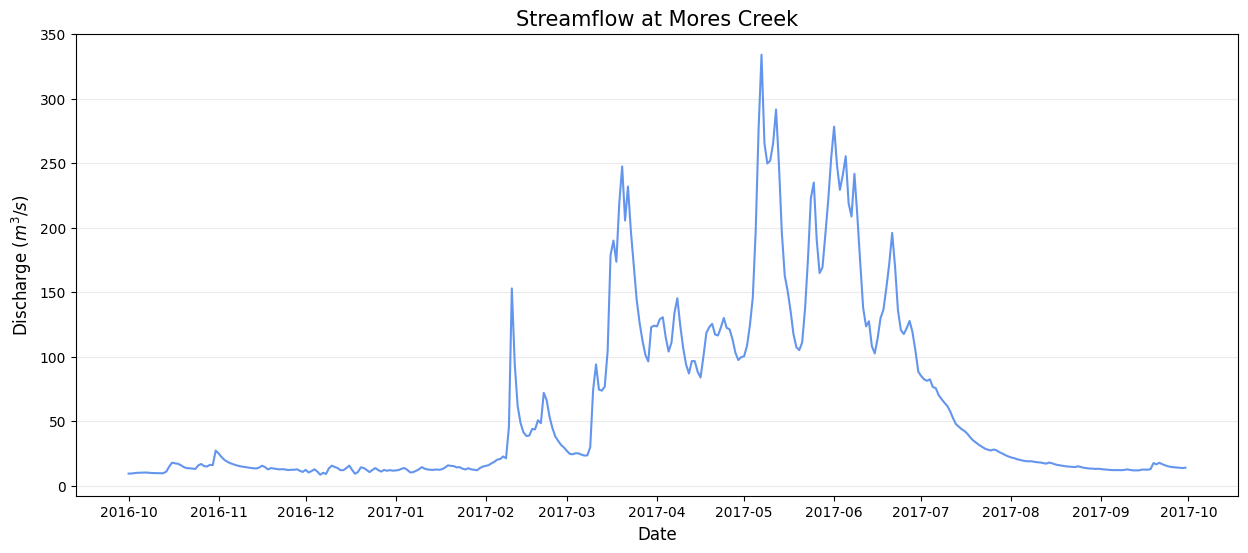

In [44]:
import matplotlib.dates as mdates

plt.figure(figsize=(15,6))
plt.title('Streamflow at Mores Creek', fontsize='15')
plt.plot(df.date, df.q_cfs, color='cornflowerblue')
#plt.scatter(df.date, df.q_cfs, marker='*', color='lightskyblue')
plt.xlabel('Date', fontsize=12)
plt.ylabel(f'Discharge ($m^3/s$)', fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
#plt.legend()
plt.grid(axis='y', alpha=0.25)
plt.show()